In [99]:
%pylab inline
import pandas as pd
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot
# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

Populating the interactive namespace from numpy and matplotlib


In [100]:
perfs = pd.read_csv('equal-weight-strategies-perfs.csv')
perfs = perfs.drop(['Unnamed: 0', 'count'], axis=1)

In [101]:
perfs.sort_values('sterling_ratio', ascending=False).head()


,mean,std,min,25%,50%,75%,max,sterling_ratio,market_condition,trading_frequency,strategy
14,0.531004,0.790729,-0.211682,0.020876,0.158653,0.717482,2.029541,7.510024,all,twenty-four-hour,peakriderstrategy
13,0.516556,0.769131,-0.211682,0.028394,0.146664,0.702457,1.989983,7.266043,all,twenty-four-hour,buffedcoinstrategy
10,0.514576,0.775704,-0.216898,0.029210,0.152678,0.641600,2.331174,6.842526,all,twelve-hour,buffedcoinstrategy
8,0.556984,0.871561,-0.257140,0.020682,0.180783,0.652700,2.682119,6.330875,all,six-hour,peakriderstrategy
7,0.557846,0.882946,-0.260039,0.017855,0.189226,0.643004,2.758506,6.323105,all,six-hour,buffedcoinstrategy


In [102]:
perfs.sort_values('mean', ascending=False).head()


,mean,std,min,25%,50%,75%,max,sterling_ratio,market_condition,trading_frequency,strategy
4,0.563940,0.945532,-0.287097,0.017935,0.120934,0.622768,2.913061,5.433641,all,three-hour,buffedcoinstrategy
5,0.563632,0.935457,-0.285547,0.017646,0.126567,0.613218,2.805151,5.471013,all,three-hour,peakriderstrategy
7,0.557846,0.882946,-0.260039,0.017855,0.189226,0.643004,2.758506,6.323105,all,six-hour,buffedcoinstrategy
8,0.556984,0.871561,-0.257140,0.020682,0.180783,0.652700,2.682119,6.330875,all,six-hour,peakriderstrategy
1,0.543056,0.943758,-0.419951,-0.039815,0.159696,0.724327,2.685221,3.690599,all,one-hour,buffedcoinstrategy


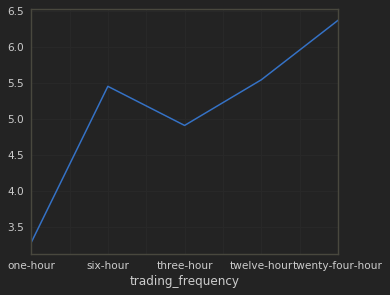

In [103]:
perfs.groupby('trading_frequency').mean()['sterling_ratio'].plot()


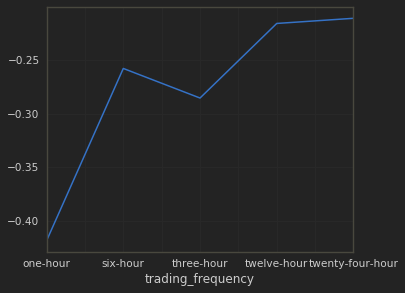

In [104]:
perfs.groupby('trading_frequency').mean()['min'].plot()


In [106]:

perfs[perfs['trading_frequency'] == 'twenty-four-hour'] \
.groupby('strategy') \
.mean()


,mean,std,min,25%,50%,75%,max,sterling_ratio
strategy,,,,,,,,
buffedcoinstrategy,0.516556,0.769131,-0.211682,0.028394,0.146664,0.702457,1.989983,7.266043
buyholdstrategy,0.449894,0.730182,-0.209816,-0.007216,0.112282,0.570319,2.007246,4.337198
peakriderstrategy,0.531004,0.790729,-0.211682,0.020876,0.158653,0.717482,2.029541,7.510024
